 #                                         Speech-To-Text

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

### Spectrogram

#### In below blog they tried with sample of wave file 
        https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

#### Lets try with other feature like spectrogram
        Data : https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

In [2]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'

In [3]:
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [4]:
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
from shutil import copy2 as cp

In [5]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [6]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-5-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([14, 23, 19, ..., 19, 22, 24], dtype=int16), 16000)

In [7]:
def graph_spectrogram(wavname):
    sound_info, frame_rate = get_wav_info(wavname)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['savefig.facecolor'] = 'black'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['lines.color'] = 'white'
    plt.rcParams['text.color'] = 'white'    
    plt.rcParams['xtick.color'] = 'white'    
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    fig = plt.figure(num=None, figsize=(12, 7.5), dpi=90)
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
    ax.tick_params(axis='both', direction='inout')
    plt.title('Spectrogram')
    plt.xlabel('time in seconds')
    plt.ylabel('Frequency (Khz)')
    plt.specgram(sound_info, Fs=frame_rate, cmap='gnuplot')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('dB')
    

<ipython-input-5-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


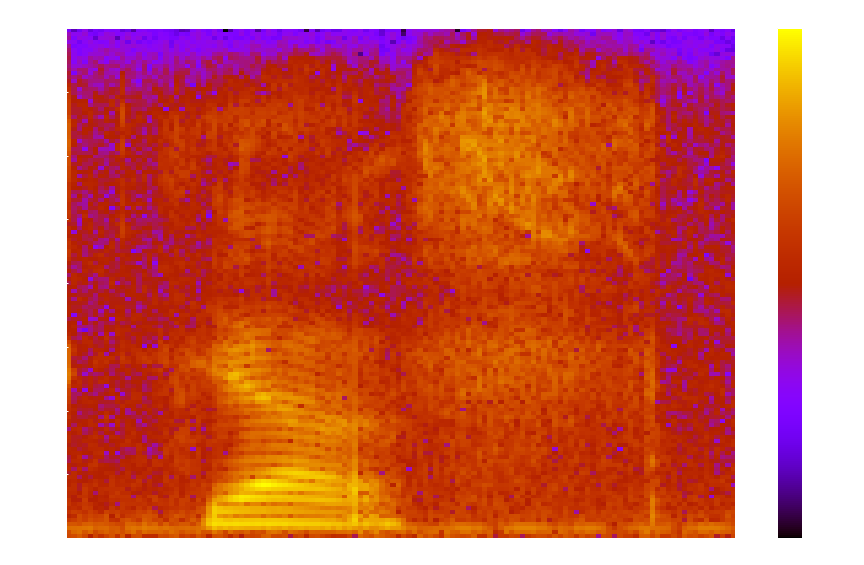

In [8]:
graph_spectrogram(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-9-335fa980a1ff>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


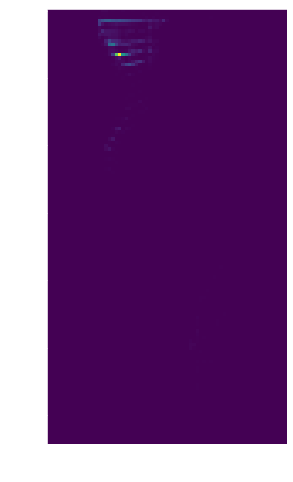

In [9]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [10]:
samples

array([14, 23, 19, ..., 19, 22, 24], dtype=int16)

<ipython-input-11-aee4b22a3610>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


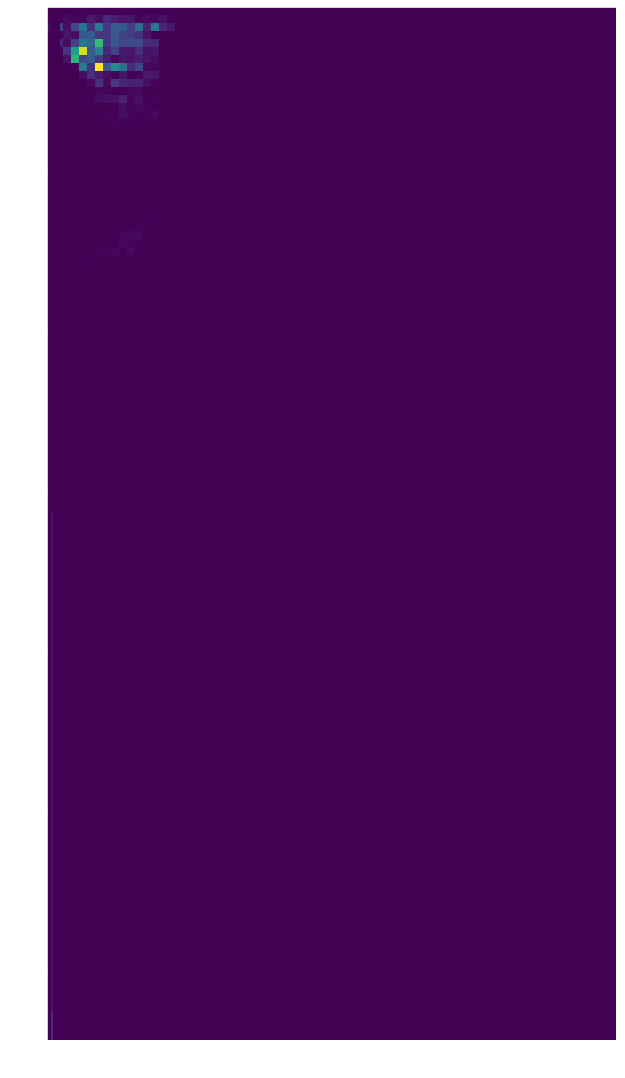

In [11]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/c1e0e8e3_nohash_2.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,19))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [12]:
times


array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

In [13]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [14]:
spectrogram

array([[3.00019264e+00, 2.95396179e+02, 5.75027344e+02, ...,
        1.79564282e-02, 1.45896345e-01, 1.08136326e-01],
       [1.98152087e+03, 1.29215466e+03, 3.45545435e+03, ...,
        2.68431716e-02, 8.66682976e-02, 8.95222574e-02],
       [4.03468701e+03, 2.29850859e+04, 4.63264746e+03, ...,
        1.47732571e-01, 1.38542557e+00, 2.04377007e+00],
       ...,
       [2.17786214e-06, 7.21325159e-06, 9.72227735e-06, ...,
        6.62526872e-05, 3.59796650e-05, 3.57009048e-05],
       [2.56235626e-06, 4.23171005e-05, 9.75406783e-06, ...,
        3.12677876e-04, 1.18152806e-04, 2.74950253e-05],
       [1.65188965e-06, 3.33031221e-06, 1.68632978e-05, ...,
        4.31949911e-06, 1.89926450e-05, 2.40293417e-07]], dtype=float32)

### Load Audio Data

In [15]:
data = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        files = os.listdir(os.path.join(audios_dir,d))
        audios = [f for f in files if f.endswith('.wav')]
        for file in audios:
            # load the image, swap color channels, and resize it to be a fixed
            # 224x224 pixels while ignoring aspect ratio
            #file = audios[i]
            sample_rate, samples = wavfile.read(os.path.join(audios_dir,d,file))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

            # convert the image data to NumPy arrays while scaling the pixel
            # intensities to the range [0, 255]
            #image = np.array(image)/255.0
            
            # update the data and labels lists, respectively
            if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
                data.append(spectrogram[:128,:48])
                labels.append(d)  # d est nom du dossier
            #else:
             #   print(spectrogram.shape)


down
go
left
no
off
on
right
stop
up
yes


In [16]:
data[0]

array([[3.4946587e-04, 2.1851694e-04, 8.2882143e-05, ..., 2.6568970e+01,
        2.8603546e+02, 2.3799536e+02],
       [2.4631266e-02, 9.7784307e-03, 1.1609027e-02, ..., 5.7106433e+02,
        1.2906905e+02, 7.2216943e+02],
       [3.2373827e-02, 3.5254853e-03, 7.3761251e-03, ..., 3.4563008e+04,
        3.6066930e+04, 1.7653605e+04],
       ...,
       [1.6769261e-05, 1.5220660e-05, 3.0395244e-05, ..., 2.6749960e-05,
        2.3588993e-05, 1.2733555e-06],
       [2.3327733e-05, 2.6257073e-06, 1.3387314e-05, ..., 7.7658715e-06,
        6.7493573e-07, 6.1118672e-06],
       [2.2200644e-05, 1.9091246e-06, 5.3932908e-06, ..., 2.2679484e-05,
        1.1653567e-05, 3.8602493e-06]], dtype=float32)

In [17]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [19]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [20]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [21]:
data = np.array(data)

In [22]:
data.shape

(23455, 128, 48)

### Class distribution

In [23]:
values,count = np.unique(labels,return_counts=True)

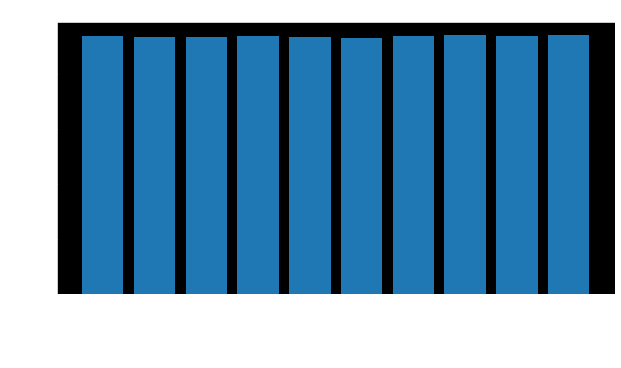

In [24]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(words))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, words, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [25]:
len(labels)

23455

In [26]:
labels_backup = labels

In [27]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [28]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [29]:
labels_categoricals = to_categorical(ls)

In [30]:
labels_categoricals

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
labels_categoricals.shape

(23455, 10)

### Data splitting - Train,CV and Test 

In [32]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [33]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (14073, 128, 48)
Cross-Validation data size :  (4691, 128, 48)
Test data size :  (4691, 128, 48)


In [34]:
trainX.shape
testX.shape

(4691, 128, 48)

In [35]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [36]:
trainX.shape
testX.shape

(4691, 128, 48, 1)

In [37]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 14073 and each image is of shape : (14073, 128, 48, 1)
Number of cross validation examples : 4691 and each image is of shape : (4691, 128, 48, 1)
Number of testing examples : 4691 and each image is of shape : (4691, 128, 48, 1)


### VGG16 Model

In [38]:
!pip install nvidia-ml-py3 

In [35]:
import tensorflow as tf

In [36]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

In [37]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [39]:

#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 150
batch_size = 32
num_class = 10
#input_shape = (224,224,3) #(513, 800, 3)

In [40]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import (BatchNormalization)

from keras.layers import Conv2D, MaxPooling2D

In [41]:
teacher = Sequential(name="teacher")
teacher.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
teacher.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(Conv2D(256, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Flatten())
teacher.add(Dense(256, activation='relu'))
teacher.add(Dropout(0.5))
teacher.add(Dense(num_class, activation='softmax'))

teacher.summary()

Model: "teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 48, 8)        40        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 48, 16)       528       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 24, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 24, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64, 24, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 24, 32)        2080

In [43]:
student = Sequential(name="student")
student.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
student.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(BatchNormalization())
student.add(Dropout(0.5))
student.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
student.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(BatchNormalization())
student.add(Dropout(0.5))
student.add(Flatten())
student.add(Dense(64, activation='relu'))
student.add(Dropout(0.5))
student.add(Dense(num_class, activation='softmax'))

student.summary()

Model: "student"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 48, 8)        40        
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 48, 16)       528       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 24, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 64, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64, 24, 16)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 24, 32)        2080

In [44]:
from tensorflow import keras

In [45]:
student_scratch = keras.models.clone_model(student)

In [50]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
teacher.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [48]:
!nvidia-smi

Wed Jul 27 16:58:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8    11W /  N/A |    362MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [52]:

history = teacher.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
440/440 [==============================] - 19s 17ms/step - loss: 2.6302 - accuracy: 0.1046 - val_loss: 2.3209 - val_accuracy: 0.1083
Epoch 2/150
440/440 [==============================] - 6s 15ms/step - loss: 2.3304 - accuracy: 0.1044 - val_loss: 2.4430 - val_accuracy: 0.1064
Epoch 3/150
440/440 [==============================] - 6s 14ms/step - loss: 2.3042 - accuracy: 0.1023 - val_loss: 2.2883 - val_accuracy: 0.1091
Epoch 4/150
440/440 [==============================] - 6s 14ms/step - loss: 2.2955 - accuracy: 0.1077 - val_loss: 2.2834 - val_accuracy: 0.1241
Epoch 5/150
440/440 [==============================] - 6s 14ms/step - loss: 2.2895 - accuracy: 0.1090 - val_loss: 2.2793 - val_accuracy: 0.1170
Epoch 6/150
440/440 [==============================] - 6s 14ms/step - loss: 2.2912 - accuracy: 0.1152 - val_loss: 3.7958 - val_accuracy: 0.1066
Epoch 7/150
440/440 [==============================] - 6s 15ms/step - loss: 2.2761 - accuracy: 0.1231 - val_loss: 3.9355 - val_accuracy

In [53]:
teacher.save("C:/Users/Tuf F15/Desktop/DATASET/specMethod")

INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/specMethod\assets


INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/specMethod\assets


ValueError: x and y must have same first dimension, but have shapes (150,) and (143,)

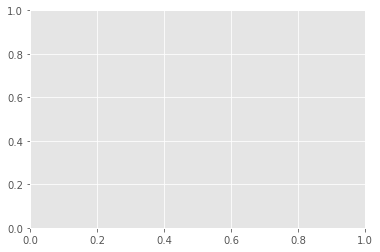

In [52]:
# plot the training loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train/CV Loss on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

ValueError: x and y must have same first dimension, but have shapes (150,) and (143,)

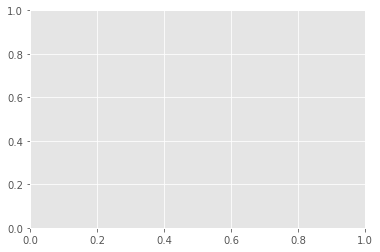

In [53]:
# plot the training accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and CV Accuracy on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [54]:
best_acc = max(history.history["val_accuracy"])

In [55]:
best_acc*100

87.23086714744568

### Distillate

In [62]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [63]:
distiller = Distiller(student=student, teacher=teacher)

distiller.compile(optimizer='adam', metrics=['accuracy'], student_loss_fn=keras.losses.CategoricalCrossentropy(from_logits=True), distillation_loss_fn=keras.losses.CategoricalCrossentropy(from_logits=True))

In [64]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [65]:
history = distiller.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1040 - student_loss: 2.5459 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 6s 11ms/step - accuracy: 0.1040 - student_loss: 2.5454 - distillation_loss: 20.7233 - val_accuracy: 0.1021 - val_student_loss: 2.3074
Epoch 2/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.0997 - student_loss: 2.3178 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.0995 - student_loss: 2.3177 - distillation_loss: 20.7233 - val_accuracy: 0.1000 - val_student_loss: 2.3087
Epoch 3/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1013 - student_loss: 2.3014 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1013 - student_loss: 2.3014 - distillation_loss: 20.7233 - val_accuracy: 0.1004 - val_student_loss: 2.3071
Epoch 4/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.0973 - student_loss: 2.3087 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.0971 - student_loss: 2.3086 - distillation_loss: 20.7233 - val_accuracy: 0.1025 - val_student_loss: 2.3075
Epoch 5/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.0979 - student_loss: 2.3029 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.0977 - student_loss: 2.3029 - distillation_loss: 20.7233 - val_accuracy: 0.1004 - val_student_loss: 2.3082
Epoch 6/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1005 - student_loss: 2.3020 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1005 - student_loss: 2.3020 - distillation_loss: 20.7233 - val_accuracy: 0.1062 - val_student_loss: 2.2311
Epoch 7/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1032 - student_loss: 2.2974 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1032 - student_loss: 2.2974 - distillation_loss: 20.7233 - val_accuracy: 0.1094 - val_student_loss: 2.1933
Epoch 8/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.1050 - student_loss: 2.2900 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1047 - student_loss: 2.2900 - distillation_loss: 20.7233 - val_accuracy: 0.1132 - val_student_loss: 2.3099
Epoch 9/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.1098 - student_loss: 2.2873 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1099 - student_loss: 2.2872 - distillation_loss: 20.7233 - val_accuracy: 0.1098 - val_student_loss: 2.5380
Epoch 10/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1126 - student_loss: 2.2870 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1126 - student_loss: 2.2871 - distillation_loss: 20.7233 - val_accuracy: 0.1341 - val_student_loss: 2.1341
Epoch 11/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.1176 - student_loss: 2.2727 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1177 - student_loss: 2.2725 - distillation_loss: 20.7233 - val_accuracy: 0.1294 - val_student_loss: 2.0958
Epoch 12/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.1269 - student_loss: 2.2586 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1273 - student_loss: 2.2584 - distillation_loss: 20.7232 - val_accuracy: 0.1168 - val_student_loss: 2.2369
Epoch 13/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.1358 - student_loss: 2.2378 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1359 - student_loss: 2.2404 - distillation_loss: 20.7232 - val_accuracy: 0.1177 - val_student_loss: 2.4750
Epoch 14/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.1461 - student_loss: 2.2194 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1465 - student_loss: 2.2194 - distillation_loss: 20.7232 - val_accuracy: 0.1121 - val_student_loss: 2.6300
Epoch 15/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1516 - student_loss: 2.1955 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1517 - student_loss: 2.1951 - distillation_loss: 20.7232 - val_accuracy: 0.1563 - val_student_loss: 2.2167
Epoch 16/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1535 - student_loss: 2.1690 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1536 - student_loss: 2.1692 - distillation_loss: 20.7232 - val_accuracy: 0.2000 - val_student_loss: 2.1371
Epoch 17/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.1604 - student_loss: 2.1564 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1604 - student_loss: 2.1568 - distillation_loss: 20.7232 - val_accuracy: 0.2119 - val_student_loss: 2.0082
Epoch 18/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1580 - student_loss: 2.1504 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1579 - student_loss: 2.1502 - distillation_loss: 20.7232 - val_accuracy: 0.1991 - val_student_loss: 2.0605
Epoch 19/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.1666 - student_loss: 2.1360 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1666 - student_loss: 2.1368 - distillation_loss: 20.7232 - val_accuracy: 0.1757 - val_student_loss: 2.1905
Epoch 20/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.1677 - student_loss: 2.1359 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1678 - student_loss: 2.1366 - distillation_loss: 20.7232 - val_accuracy: 0.1835 - val_student_loss: 2.1594
Epoch 21/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1754 - student_loss: 2.1243 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1755 - student_loss: 2.1241 - distillation_loss: 20.7232 - val_accuracy: 0.2458 - val_student_loss: 1.9313
Epoch 22/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1728 - student_loss: 2.1129 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1726 - student_loss: 2.1127 - distillation_loss: 20.7232 - val_accuracy: 0.1985 - val_student_loss: 2.2503
Epoch 23/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.1789 - student_loss: 2.1006 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1791 - student_loss: 2.0995 - distillation_loss: 20.7232 - val_accuracy: 0.1891 - val_student_loss: 2.4543
Epoch 24/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1747 - student_loss: 2.1052 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1747 - student_loss: 2.1053 - distillation_loss: 20.7232 - val_accuracy: 0.1526 - val_student_loss: 2.5358
Epoch 25/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.1827 - student_loss: 2.0927 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1830 - student_loss: 2.0924 - distillation_loss: 20.7232 - val_accuracy: 0.2093 - val_student_loss: 2.1004
Epoch 26/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.1859 - student_loss: 2.0836 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1859 - student_loss: 2.0836 - distillation_loss: 20.7232 - val_accuracy: 0.1646 - val_student_loss: 2.3953
Epoch 27/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.1809 - student_loss: 2.0802 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1806 - student_loss: 2.0804 - distillation_loss: 20.7232 - val_accuracy: 0.1842 - val_student_loss: 2.2171
Epoch 28/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1870 - student_loss: 2.0656 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1870 - student_loss: 2.0656 - distillation_loss: 20.7232 - val_accuracy: 0.2117 - val_student_loss: 2.2255
Epoch 29/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.1926 - student_loss: 2.0651 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1926 - student_loss: 2.0646 - distillation_loss: 20.7232 - val_accuracy: 0.1848 - val_student_loss: 2.3428
Epoch 30/150
440/440 [==============================] - ETA: 0s - accuracy: 0.1879 - student_loss: 2.0619 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1879 - student_loss: 2.0616 - distillation_loss: 20.7232 - val_accuracy: 0.2707 - val_student_loss: 1.9508
Epoch 31/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.1959 - student_loss: 2.0552 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1956 - student_loss: 2.0560 - distillation_loss: 20.7232 - val_accuracy: 0.1921 - val_student_loss: 2.4541
Epoch 32/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.1981 - student_loss: 2.0497 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.1988 - student_loss: 2.0484 - distillation_loss: 20.7232 - val_accuracy: 0.1916 - val_student_loss: 2.2582
Epoch 33/150
440/440 [==============================] - ETA: 0s - accuracy: 0.2034 - student_loss: 2.0216 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2034 - student_loss: 2.0214 - distillation_loss: 20.7233 - val_accuracy: 0.2119 - val_student_loss: 2.2827
Epoch 34/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.2054 - student_loss: 2.0254 - distillation_loss: 20.7232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2057 - student_loss: 2.0252 - distillation_loss: 20.7232 - val_accuracy: 0.2793 - val_student_loss: 2.0257
Epoch 35/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.2144 - student_loss: 2.0091 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2145 - student_loss: 2.0080 - distillation_loss: 20.7233 - val_accuracy: 0.2117 - val_student_loss: 2.2293
Epoch 36/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.2268 - student_loss: 1.9917 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2265 - student_loss: 1.9930 - distillation_loss: 20.7233 - val_accuracy: 0.1987 - val_student_loss: 2.5021
Epoch 37/150
440/440 [==============================] - ETA: 0s - accuracy: 0.2417 - student_loss: 1.9681 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2417 - student_loss: 1.9677 - distillation_loss: 20.7233 - val_accuracy: 0.2281 - val_student_loss: 2.1132
Epoch 38/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.2422 - student_loss: 1.9496 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2422 - student_loss: 1.9526 - distillation_loss: 20.7233 - val_accuracy: 0.2944 - val_student_loss: 1.8695
Epoch 39/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.2496 - student_loss: 1.9280 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2497 - student_loss: 1.9273 - distillation_loss: 20.7233 - val_accuracy: 0.2846 - val_student_loss: 1.8096
Epoch 40/150
440/440 [==============================] - ETA: 0s - accuracy: 0.2637 - student_loss: 1.9086 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2637 - student_loss: 1.9087 - distillation_loss: 20.7233 - val_accuracy: 0.3400 - val_student_loss: 1.8850
Epoch 41/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.2663 - student_loss: 1.9037 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2658 - student_loss: 1.9045 - distillation_loss: 20.7233 - val_accuracy: 0.1744 - val_student_loss: 2.8603
Epoch 42/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.2795 - student_loss: 1.8642 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2796 - student_loss: 1.8629 - distillation_loss: 20.7233 - val_accuracy: 0.4008 - val_student_loss: 1.7531
Epoch 43/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.2876 - student_loss: 1.8482 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2879 - student_loss: 1.8474 - distillation_loss: 20.7233 - val_accuracy: 0.3490 - val_student_loss: 1.7695
Epoch 44/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.2884 - student_loss: 1.8319 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.2885 - student_loss: 1.8304 - distillation_loss: 20.7233 - val_accuracy: 0.3624 - val_student_loss: 1.9692
Epoch 45/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.3054 - student_loss: 1.8042 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3054 - student_loss: 1.8033 - distillation_loss: 20.7233 - val_accuracy: 0.3053 - val_student_loss: 2.3239
Epoch 46/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.3072 - student_loss: 1.8038 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3073 - student_loss: 1.8035 - distillation_loss: 20.7233 - val_accuracy: 0.4513 - val_student_loss: 1.6479
Epoch 47/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.3151 - student_loss: 1.7828 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3154 - student_loss: 1.7821 - distillation_loss: 20.7233 - val_accuracy: 0.4538 - val_student_loss: 1.6467
Epoch 48/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.3151 - student_loss: 1.7823 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3150 - student_loss: 1.7813 - distillation_loss: 20.7233 - val_accuracy: 0.3790 - val_student_loss: 1.8595
Epoch 49/150
440/440 [==============================] - ETA: 0s - accuracy: 0.3289 - student_loss: 1.7531 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3289 - student_loss: 1.7527 - distillation_loss: 20.7233 - val_accuracy: 0.4249 - val_student_loss: 1.6927
Epoch 50/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.3377 - student_loss: 1.7408 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3382 - student_loss: 1.7405 - distillation_loss: 20.7233 - val_accuracy: 0.4628 - val_student_loss: 1.5853
Epoch 51/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.3438 - student_loss: 1.7269 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3439 - student_loss: 1.7261 - distillation_loss: 20.7233 - val_accuracy: 0.4956 - val_student_loss: 1.5759
Epoch 52/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.3506 - student_loss: 1.7098 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3502 - student_loss: 1.7108 - distillation_loss: 20.7233 - val_accuracy: 0.4406 - val_student_loss: 1.8079
Epoch 53/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.3576 - student_loss: 1.6901 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3576 - student_loss: 1.6896 - distillation_loss: 20.7233 - val_accuracy: 0.4698 - val_student_loss: 1.5420
Epoch 54/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.3607 - student_loss: 1.6792 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3615 - student_loss: 1.6782 - distillation_loss: 20.7233 - val_accuracy: 0.4860 - val_student_loss: 1.5235
Epoch 55/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.3858 - student_loss: 1.6375 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3856 - student_loss: 1.6379 - distillation_loss: 20.7233 - val_accuracy: 0.3722 - val_student_loss: 1.6918
Epoch 56/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.3809 - student_loss: 1.6360 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3815 - student_loss: 1.6360 - distillation_loss: 20.7233 - val_accuracy: 0.4946 - val_student_loss: 1.4583
Epoch 57/150
440/440 [==============================] - ETA: 0s - accuracy: 0.3920 - student_loss: 1.6141 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.3920 - student_loss: 1.6139 - distillation_loss: 20.7233 - val_accuracy: 0.4779 - val_student_loss: 1.4709
Epoch 58/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.4047 - student_loss: 1.5688 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4047 - student_loss: 1.5678 - distillation_loss: 20.7233 - val_accuracy: 0.4711 - val_student_loss: 1.5893
Epoch 59/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.4204 - student_loss: 1.5423 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4204 - student_loss: 1.5419 - distillation_loss: 20.7233 - val_accuracy: 0.4144 - val_student_loss: 1.6986
Epoch 60/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.4280 - student_loss: 1.5087 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4281 - student_loss: 1.5087 - distillation_loss: 20.7233 - val_accuracy: 0.4935 - val_student_loss: 1.4073
Epoch 61/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.4319 - student_loss: 1.4906 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4325 - student_loss: 1.4886 - distillation_loss: 20.7233 - val_accuracy: 0.4643 - val_student_loss: 1.6851
Epoch 62/150
440/440 [==============================] - ETA: 0s - accuracy: 0.4423 - student_loss: 1.4691 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4423 - student_loss: 1.4693 - distillation_loss: 20.7233 - val_accuracy: 0.5297 - val_student_loss: 1.3237
Epoch 63/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.4571 - student_loss: 1.4305 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4566 - student_loss: 1.4307 - distillation_loss: 20.7233 - val_accuracy: 0.5374 - val_student_loss: 1.4863
Epoch 64/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.4768 - student_loss: 1.3893 - distillation_loss: 20.7233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4769 - student_loss: 1.3886 - distillation_loss: 20.7233 - val_accuracy: 0.5353 - val_student_loss: 1.3805
Epoch 65/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.4779 - student_loss: 1.3746 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4781 - student_loss: 1.3745 - distillation_loss: 20.7234 - val_accuracy: 0.5496 - val_student_loss: 1.3811
Epoch 66/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.4986 - student_loss: 1.3471 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.4985 - student_loss: 1.3500 - distillation_loss: 20.7234 - val_accuracy: 0.5248 - val_student_loss: 1.2568
Epoch 67/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.5066 - student_loss: 1.3188 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5066 - student_loss: 1.3193 - distillation_loss: 20.7234 - val_accuracy: 0.5229 - val_student_loss: 1.3430
Epoch 68/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.5061 - student_loss: 1.2974 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5064 - student_loss: 1.2960 - distillation_loss: 20.7234 - val_accuracy: 0.5796 - val_student_loss: 1.3857
Epoch 69/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.5231 - student_loss: 1.2713 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5233 - student_loss: 1.2724 - distillation_loss: 20.7234 - val_accuracy: 0.5551 - val_student_loss: 1.3376
Epoch 70/150
440/440 [==============================] - ETA: 0s - accuracy: 0.5434 - student_loss: 1.2295 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5434 - student_loss: 1.2300 - distillation_loss: 20.7234 - val_accuracy: 0.5589 - val_student_loss: 1.3155
Epoch 71/150
440/440 [==============================] - ETA: 0s - accuracy: 0.5462 - student_loss: 1.2114 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5462 - student_loss: 1.2111 - distillation_loss: 20.7234 - val_accuracy: 0.4728 - val_student_loss: 1.4904
Epoch 72/150
440/440 [==============================] - ETA: 0s - accuracy: 0.5528 - student_loss: 1.2036 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5528 - student_loss: 1.2033 - distillation_loss: 20.7234 - val_accuracy: 0.5581 - val_student_loss: 1.3594
Epoch 73/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.5674 - student_loss: 1.1757 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5673 - student_loss: 1.1764 - distillation_loss: 20.7234 - val_accuracy: 0.5873 - val_student_loss: 1.3122
Epoch 74/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.5693 - student_loss: 1.1490 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5692 - student_loss: 1.1499 - distillation_loss: 20.7234 - val_accuracy: 0.5638 - val_student_loss: 1.3536
Epoch 75/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.5774 - student_loss: 1.1379 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5774 - student_loss: 1.1371 - distillation_loss: 20.7234 - val_accuracy: 0.5924 - val_student_loss: 1.2463
Epoch 76/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.5871 - student_loss: 1.1159 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5859 - student_loss: 1.1180 - distillation_loss: 20.7235 - val_accuracy: 0.6191 - val_student_loss: 1.1678
Epoch 77/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.5881 - student_loss: 1.1057 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5878 - student_loss: 1.1069 - distillation_loss: 20.7234 - val_accuracy: 0.6035 - val_student_loss: 1.1844
Epoch 78/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.5962 - student_loss: 1.1095 - distillation_loss: 20.7234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5964 - student_loss: 1.1081 - distillation_loss: 20.7234 - val_accuracy: 0.5790 - val_student_loss: 1.2175
Epoch 79/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.5978 - student_loss: 1.0666 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.5983 - student_loss: 1.0631 - distillation_loss: 20.7235 - val_accuracy: 0.6421 - val_student_loss: 1.0437
Epoch 80/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.6108 - student_loss: 1.0483 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6105 - student_loss: 1.0481 - distillation_loss: 20.7235 - val_accuracy: 0.5826 - val_student_loss: 1.2348
Epoch 81/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.6209 - student_loss: 1.0306 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6208 - student_loss: 1.0307 - distillation_loss: 20.7235 - val_accuracy: 0.5886 - val_student_loss: 1.1764
Epoch 82/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.6236 - student_loss: 1.0279 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6237 - student_loss: 1.0293 - distillation_loss: 20.7235 - val_accuracy: 0.5572 - val_student_loss: 1.2701
Epoch 83/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.6274 - student_loss: 1.0090 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6276 - student_loss: 1.0088 - distillation_loss: 20.7235 - val_accuracy: 0.6389 - val_student_loss: 1.0787
Epoch 84/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.6362 - student_loss: 0.9926 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6365 - student_loss: 0.9914 - distillation_loss: 20.7235 - val_accuracy: 0.5464 - val_student_loss: 1.3187
Epoch 85/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.6336 - student_loss: 0.9844 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6338 - student_loss: 0.9847 - distillation_loss: 20.7235 - val_accuracy: 0.6039 - val_student_loss: 1.2143
Epoch 86/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.6354 - student_loss: 0.9849 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6357 - student_loss: 0.9846 - distillation_loss: 20.7235 - val_accuracy: 0.6120 - val_student_loss: 1.1649
Epoch 87/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.6463 - student_loss: 0.9679 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6453 - student_loss: 0.9688 - distillation_loss: 20.7235 - val_accuracy: 0.6802 - val_student_loss: 1.1021
Epoch 88/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.6438 - student_loss: 0.9683 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6436 - student_loss: 0.9681 - distillation_loss: 20.7235 - val_accuracy: 0.6210 - val_student_loss: 1.1722
Epoch 89/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.6535 - student_loss: 0.9445 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.6531 - student_loss: 0.9448 - distillation_loss: 20.7235 - val_accuracy: 0.7052 - val_student_loss: 1.0104
Epoch 90/150
440/440 [==============================] - ETA: 0s - accuracy: 0.6562 - student_loss: 0.9275 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.6562 - student_loss: 0.9289 - distillation_loss: 20.7235 - val_accuracy: 0.6585 - val_student_loss: 1.0301
Epoch 91/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.6657 - student_loss: 0.9076 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6657 - student_loss: 0.9073 - distillation_loss: 20.7235 - val_accuracy: 0.7099 - val_student_loss: 0.9992
Epoch 92/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.6594 - student_loss: 0.9212 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6595 - student_loss: 0.9198 - distillation_loss: 20.7235 - val_accuracy: 0.6773 - val_student_loss: 1.0716
Epoch 93/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.6673 - student_loss: 0.9155 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6676 - student_loss: 0.9138 - distillation_loss: 20.7235 - val_accuracy: 0.5881 - val_student_loss: 1.1782
Epoch 94/150
440/440 [==============================] - ETA: 0s - accuracy: 0.6726 - student_loss: 0.8904 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6726 - student_loss: 0.8904 - distillation_loss: 20.7235 - val_accuracy: 0.6370 - val_student_loss: 1.0693
Epoch 95/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.6760 - student_loss: 0.8805 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6762 - student_loss: 0.8793 - distillation_loss: 20.7235 - val_accuracy: 0.6898 - val_student_loss: 1.0359
Epoch 96/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.6803 - student_loss: 0.8688 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6803 - student_loss: 0.8694 - distillation_loss: 20.7235 - val_accuracy: 0.6932 - val_student_loss: 0.9814
Epoch 97/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.6808 - student_loss: 0.8691 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6809 - student_loss: 0.8693 - distillation_loss: 20.7235 - val_accuracy: 0.6348 - val_student_loss: 1.0593
Epoch 98/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.6935 - student_loss: 0.8480 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6928 - student_loss: 0.8494 - distillation_loss: 20.7235 - val_accuracy: 0.6530 - val_student_loss: 1.0971
Epoch 99/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.6941 - student_loss: 0.8444 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6942 - student_loss: 0.8454 - distillation_loss: 20.7235 - val_accuracy: 0.6506 - val_student_loss: 1.3654
Epoch 100/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.6930 - student_loss: 0.8501 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6930 - student_loss: 0.8516 - distillation_loss: 20.7235 - val_accuracy: 0.6879 - val_student_loss: 0.9830
Epoch 101/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.6995 - student_loss: 0.8265 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6998 - student_loss: 0.8254 - distillation_loss: 20.7235 - val_accuracy: 0.7107 - val_student_loss: 1.0040
Epoch 102/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.6997 - student_loss: 0.8281 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6996 - student_loss: 0.8283 - distillation_loss: 20.7235 - val_accuracy: 0.7237 - val_student_loss: 1.0504
Epoch 103/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.6971 - student_loss: 0.8321 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.6970 - student_loss: 0.8322 - distillation_loss: 20.7235 - val_accuracy: 0.6954 - val_student_loss: 1.0241
Epoch 104/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7051 - student_loss: 0.8092 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7051 - student_loss: 0.8095 - distillation_loss: 20.7235 - val_accuracy: 0.7222 - val_student_loss: 0.9188
Epoch 105/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7045 - student_loss: 0.8205 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7048 - student_loss: 0.8210 - distillation_loss: 20.7235 - val_accuracy: 0.6839 - val_student_loss: 0.9655
Epoch 106/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7111 - student_loss: 0.7942 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7112 - student_loss: 0.7949 - distillation_loss: 20.7235 - val_accuracy: 0.6777 - val_student_loss: 1.0493
Epoch 107/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7126 - student_loss: 0.7975 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7126 - student_loss: 0.7982 - distillation_loss: 20.7235 - val_accuracy: 0.7274 - val_student_loss: 0.9899
Epoch 108/150
440/440 [==============================] - ETA: 0s - accuracy: 0.7123 - student_loss: 0.7937 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.7123 - student_loss: 0.7939 - distillation_loss: 20.7235 - val_accuracy: 0.6883 - val_student_loss: 1.0611
Epoch 109/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7127 - student_loss: 0.7767 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7123 - student_loss: 0.7788 - distillation_loss: 20.7235 - val_accuracy: 0.7649 - val_student_loss: 0.9243
Epoch 110/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7180 - student_loss: 0.7783 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7187 - student_loss: 0.7768 - distillation_loss: 20.7235 - val_accuracy: 0.7097 - val_student_loss: 1.0129
Epoch 111/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.7246 - student_loss: 0.7697 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7247 - student_loss: 0.7694 - distillation_loss: 20.7235 - val_accuracy: 0.7491 - val_student_loss: 0.9518
Epoch 112/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7249 - student_loss: 0.7595 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7246 - student_loss: 0.7604 - distillation_loss: 20.7235 - val_accuracy: 0.7203 - val_student_loss: 0.9129
Epoch 113/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7198 - student_loss: 0.7758 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7206 - student_loss: 0.7742 - distillation_loss: 20.7235 - val_accuracy: 0.7114 - val_student_loss: 0.9561
Epoch 114/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7246 - student_loss: 0.7659 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7251 - student_loss: 0.7644 - distillation_loss: 20.7235 - val_accuracy: 0.7318 - val_student_loss: 0.9486
Epoch 115/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7305 - student_loss: 0.7524 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7305 - student_loss: 0.7523 - distillation_loss: 20.7235 - val_accuracy: 0.7476 - val_student_loss: 0.9390
Epoch 116/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7285 - student_loss: 0.7435 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7284 - student_loss: 0.7448 - distillation_loss: 20.7235 - val_accuracy: 0.7423 - val_student_loss: 1.0047
Epoch 117/150
440/440 [==============================] - ETA: 0s - accuracy: 0.7323 - student_loss: 0.7402 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7323 - student_loss: 0.7409 - distillation_loss: 20.7235 - val_accuracy: 0.7589 - val_student_loss: 1.0052
Epoch 118/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.7275 - student_loss: 0.7358 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7270 - student_loss: 0.7376 - distillation_loss: 20.7235 - val_accuracy: 0.7706 - val_student_loss: 1.0560
Epoch 119/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7295 - student_loss: 0.7426 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7297 - student_loss: 0.7443 - distillation_loss: 20.7235 - val_accuracy: 0.7384 - val_student_loss: 0.9787
Epoch 120/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7344 - student_loss: 0.7408 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7340 - student_loss: 0.7410 - distillation_loss: 20.7235 - val_accuracy: 0.6683 - val_student_loss: 1.5463
Epoch 121/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7441 - student_loss: 0.7142 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7442 - student_loss: 0.7145 - distillation_loss: 20.7235 - val_accuracy: 0.7659 - val_student_loss: 1.0643
Epoch 122/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7414 - student_loss: 0.7175 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7414 - student_loss: 0.7168 - distillation_loss: 20.7235 - val_accuracy: 0.7651 - val_student_loss: 0.9409
Epoch 123/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7391 - student_loss: 0.7162 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7393 - student_loss: 0.7160 - distillation_loss: 20.7235 - val_accuracy: 0.7576 - val_student_loss: 1.0295
Epoch 124/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7425 - student_loss: 0.7118 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7428 - student_loss: 0.7108 - distillation_loss: 20.7235 - val_accuracy: 0.7474 - val_student_loss: 0.9393
Epoch 125/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7473 - student_loss: 0.7095 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7473 - student_loss: 0.7088 - distillation_loss: 20.7235 - val_accuracy: 0.7461 - val_student_loss: 0.9208
Epoch 126/150
440/440 [==============================] - ETA: 0s - accuracy: 0.7470 - student_loss: 0.7094 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7470 - student_loss: 0.7094 - distillation_loss: 20.7235 - val_accuracy: 0.7536 - val_student_loss: 1.0405
Epoch 127/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7491 - student_loss: 0.6878 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7490 - student_loss: 0.6903 - distillation_loss: 20.7235 - val_accuracy: 0.7384 - val_student_loss: 0.9301
Epoch 128/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7554 - student_loss: 0.6919 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7556 - student_loss: 0.6917 - distillation_loss: 20.7235 - val_accuracy: 0.7335 - val_student_loss: 0.9465
Epoch 129/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7483 - student_loss: 0.6974 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7481 - student_loss: 0.6980 - distillation_loss: 20.7235 - val_accuracy: 0.7337 - val_student_loss: 0.8640
Epoch 130/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7523 - student_loss: 0.6862 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.7526 - student_loss: 0.6844 - distillation_loss: 20.7236 - val_accuracy: 0.7713 - val_student_loss: 0.9027
Epoch 131/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7538 - student_loss: 0.6770 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7540 - student_loss: 0.6756 - distillation_loss: 20.7235 - val_accuracy: 0.7508 - val_student_loss: 0.9338
Epoch 132/150
440/440 [==============================] - ETA: 0s - accuracy: 0.7566 - student_loss: 0.6705 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7566 - student_loss: 0.6701 - distillation_loss: 20.7236 - val_accuracy: 0.7163 - val_student_loss: 1.0492
Epoch 133/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.7552 - student_loss: 0.6737 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7548 - student_loss: 0.6750 - distillation_loss: 20.7235 - val_accuracy: 0.7595 - val_student_loss: 0.9350
Epoch 134/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7569 - student_loss: 0.6738 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7566 - student_loss: 0.6763 - distillation_loss: 20.7236 - val_accuracy: 0.7589 - val_student_loss: 0.9037
Epoch 135/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7576 - student_loss: 0.6712 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.7576 - student_loss: 0.6736 - distillation_loss: 20.7235 - val_accuracy: 0.7623 - val_student_loss: 0.8910
Epoch 136/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7567 - student_loss: 0.6760 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.7568 - student_loss: 0.6762 - distillation_loss: 20.7236 - val_accuracy: 0.7512 - val_student_loss: 1.1978
Epoch 137/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7532 - student_loss: 0.6819 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7531 - student_loss: 0.6814 - distillation_loss: 20.7235 - val_accuracy: 0.7504 - val_student_loss: 0.9529
Epoch 138/150
435/440 [============================>.] - ETA: 0s - accuracy: 0.7614 - student_loss: 0.6570 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7611 - student_loss: 0.6567 - distillation_loss: 20.7236 - val_accuracy: 0.7525 - val_student_loss: 0.9310
Epoch 139/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7608 - student_loss: 0.6686 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7611 - student_loss: 0.6670 - distillation_loss: 20.7235 - val_accuracy: 0.7563 - val_student_loss: 0.9128
Epoch 140/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7594 - student_loss: 0.6653 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7589 - student_loss: 0.6659 - distillation_loss: 20.7236 - val_accuracy: 0.7107 - val_student_loss: 1.0098
Epoch 141/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7670 - student_loss: 0.6461 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7663 - student_loss: 0.6467 - distillation_loss: 20.7235 - val_accuracy: 0.7512 - val_student_loss: 0.9397
Epoch 142/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.7621 - student_loss: 0.6471 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7622 - student_loss: 0.6468 - distillation_loss: 20.7236 - val_accuracy: 0.7730 - val_student_loss: 0.9132
Epoch 143/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7701 - student_loss: 0.6364 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7698 - student_loss: 0.6372 - distillation_loss: 20.7236 - val_accuracy: 0.7220 - val_student_loss: 0.9683
Epoch 144/150
439/440 [============================>.] - ETA: 0s - accuracy: 0.7712 - student_loss: 0.6478 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7712 - student_loss: 0.6475 - distillation_loss: 20.7236 - val_accuracy: 0.7254 - val_student_loss: 1.0220
Epoch 145/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7672 - student_loss: 0.6385 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7666 - student_loss: 0.6403 - distillation_loss: 20.7236 - val_accuracy: 0.7589 - val_student_loss: 0.9674
Epoch 146/150
438/440 [============================>.] - ETA: 0s - accuracy: 0.7687 - student_loss: 0.6471 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 12ms/step - accuracy: 0.7687 - student_loss: 0.6466 - distillation_loss: 20.7235 - val_accuracy: 0.7508 - val_student_loss: 1.0244
Epoch 147/150
436/440 [============================>.] - ETA: 0s - accuracy: 0.7693 - student_loss: 0.6397 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7694 - student_loss: 0.6399 - distillation_loss: 20.7236 - val_accuracy: 0.7657 - val_student_loss: 0.9903
Epoch 148/150
440/440 [==============================] - ETA: 0s - accuracy: 0.7720 - student_loss: 0.6359 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7720 - student_loss: 0.6366 - distillation_loss: 20.7236 - val_accuracy: 0.7640 - val_student_loss: 0.9318
Epoch 149/150
437/440 [============================>.] - ETA: 0s - accuracy: 0.7689 - student_loss: 0.6498 - distillation_loss: 20.7235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7688 - student_loss: 0.6497 - distillation_loss: 20.7235 - val_accuracy: 0.7591 - val_student_loss: 0.8979
Epoch 150/150
440/440 [==============================] - ETA: 0s - accuracy: 0.7745 - student_loss: 0.6259 - distillation_loss: 20.7236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,student_loss,distillation_loss,val_accuracy,val_student_loss


440/440 [==============================] - 5s 11ms/step - accuracy: 0.7745 - student_loss: 0.6256 - distillation_loss: 20.7236 - val_accuracy: 0.7907 - val_student_loss: 0.8858


In [66]:
best_acc = max(history.history["val_accuracy"])

In [67]:
best_acc*100

79.0662944316864

In [1]:
distiller.save("C:/Users/Tuf F15/Desktop/DATASET/distMethod-VGG16-7")

NameError: name 'distiller' is not defined

In [46]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
student_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [48]:
history = student_scratch.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
440/440 [==============================] - 15s 10ms/step - loss: 2.5195 - accuracy: 0.0998 - val_loss: 2.3338 - val_accuracy: 0.1000
Epoch 2/150
440/440 [==============================] - 4s 9ms/step - loss: 2.3101 - accuracy: 0.1011 - val_loss: 2.3272 - val_accuracy: 0.1000
Epoch 3/150
440/440 [==============================] - 4s 9ms/step - loss: 2.3075 - accuracy: 0.0982 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 4/150
440/440 [==============================] - 4s 9ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3079 - val_accuracy: 0.1004
Epoch 5/150
440/440 [==============================] - 4s 9ms/step - loss: 2.3022 - accuracy: 0.0973 - val_loss: 2.3143 - val_accuracy: 0.1004
Epoch 6/150
440/440 [==============================] - 4s 9ms/step - loss: 2.3099 - accuracy: 0.0972 - val_loss: 2.3232 - val_accuracy: 0.0998
Epoch 7/150
440/440 [==============================] - 4s 9ms/step - loss: 2.3044 - accuracy: 0.0981 - val_loss: 2.3055 - val_accuracy: 0.09

In [49]:
best_acc = max(history.history["val_accuracy"])

In [50]:
best_acc*100

78.00042629241943

In [51]:
student_scratch.save("C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG7")

INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG7\assets


INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG7\assets


## Results

In [48]:
result = teacher.evaluate(testX, testY)

NameError: name 'testX' is not defined

In [ ]:
print("test loss, test acc:", result)

In [52]:
result = student_scratch.evaluate(testX, testY)

147/147 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.7723


In [53]:
print("test loss, test acc:", result)


test loss, test acc: [0.7166783809661865, 0.7723299860954285]


In [ ]:
result = distiller.evaluate(testX, testY)

In [ ]:
print("test loss, test acc:", result)

### TEST

In [41]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\test\test'

dataT = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    #file = audios[i]
    sample_rate, samples = wavfile.read(os.path.join(audios_dir,d))
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    # convert the image data to NumPy arrays while scaling the pixel
    # intensities to the range [0, 255]
    #image = np.array(image)/255.0
    
    # update the data and labels lists, respectively
    if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
        dataT.append(spectrogram[:128,:48])
    #else:
        #   print(spectrogram.shape)

c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [42]:
dataT = np.array(dataT)

In [9]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataT = dataT.reshape(dataT.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataT = dataT.reshape(dataT.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

NameError: name 'dataT' is not defined

In [44]:
dataT.shape

(4690, 128, 48, 1)

In [45]:
pre=model.predict(dataT)

147/147 [==============================] - 2s 15ms/step


In [46]:
pre.shape

(4690, 10)

In [47]:
pre[0]

array([2.9752339e-04, 1.0840432e-03, 1.6671187e-03, 2.6360370e-04,
       4.9087014e-03, 1.0133242e-03, 8.7719999e-04, 1.4864685e-03,
       9.8769987e-01, 7.0213788e-04], dtype=float32)

In [48]:
np.argmax(pre[0])

8

In [8]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [25]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_00fe78fd9.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)


NameError: name 'wavfile' is not defined

In [51]:
dataS.shape

(1, 128, 48, 1)

In [52]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 259ms/step


In [64]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [53]:
label_annot[np.argmax(pre[0])] 

'stop'

In [58]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_0a42cce82.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)



In [60]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [55]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [65]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [56]:
label_annot[np.argmax(pre[0])] 

'down'

In [63]:
from keras import backend as K


In [61]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)


c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [72]:
samples


array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-6353, -6353],
       [-7274, -7274],
       [-7034, -7034]], dtype=int16)

(2,)

In [62]:
frequencies

array([   0., 8000.])

In [58]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [66]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [59]:
label_annot[np.argmax(pre[0])] 

'yes'

In [119]:
import librosa

### Preprocessing Audio

In [274]:
from os import path
from pydub import AudioSegment, effects  
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
import soundfile
from shutil import copy2 as cp


In [122]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [331]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [352]:
# files                                                                         
src = r"C:\Users\Tuf F15\Desktop\DATASET\test2.mp3"
dst = r"C:\Users\Tuf F15\Desktop\DATASET\b.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\b.wav'>

In [372]:
# files                                                                         
src = r"C:\Users\Tuf F15\Desktop\DATASET\test4.m4a"
dst = r"C:\Users\Tuf F15\Desktop\DATASET\b.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_file(src,  format= 'm4a')
sound.export(dst, format="wav")

<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\b.wav'>

In [373]:

sound = AudioSegment.from_wav(r"C:\Users\Tuf F15\Desktop\DATASET\b.wav")
sound = sound.set_channels(1)
sound = sound.set_frame_rate(16000)
sound.export(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav", format="wav")


<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\output.wav'>

In [374]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")

<ipython-input-122-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([0, 0, 0, ..., 0, 0, 0], dtype=int16), 16000)

In [375]:
from keras import backend as K

#### TEST 4 audios test1 - test2 - test3 - test4

test1 ==> actual: left      |       predicted: left                    
test2 ==> actual: right      |      predicted: go                     
test3 ==> actual: down      |    predicted: on                        
test4 ==> actual: stop      |       predicted: stop                         

In [376]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

In [377]:
sample_rate

16000

<ipython-input-122-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


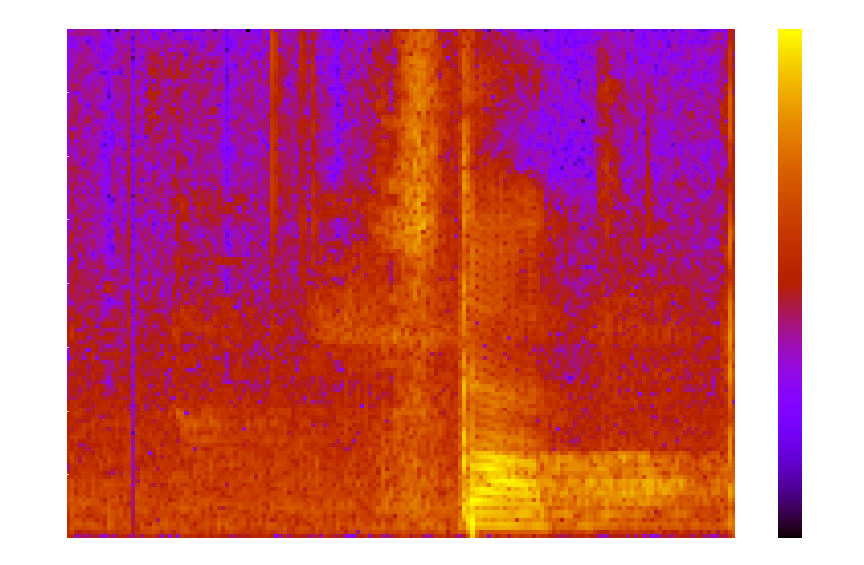

In [385]:
graph_spectrogram(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")

In [378]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [379]:
dataS.shape

(1, 128, 48, 1)

In [380]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 20ms/step


In [381]:
label_annot[np.argmax(pre[0])] 

'stop'